<a href="https://colab.research.google.com/github/RITIKA-01A/deep-learning/blob/main/Cat_vs_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#NORMALISING ALL THE PIXEL VALUES BETWEEN 0 AND 1
def process (image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


**MAKING OUR CNN MODEL**

In [ ]:
#INITIALISING THE MODEL
model = Sequential()

In [ ]:
#ADDING THE CONVOLUTIONAL LAYER
model.add(Conv2D(32 , kernel_size=(3,3),padding ='valid',activation='relu',input_shape=(256,256,3)))

#ADDING BATCH NORMALISATION TO AVOID OVERFITTING
model.add(BatchNormalization())

#ADDING THE POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


In [ ]:
#ADDING 2ND LAYER OF CONVOLUTIONAL AND POOLING LAYER
model.add(Conv2D(64 , kernel_size=(3,3),padding ='valid',activation='relu'))

#ADDING BATCH NORMALISATION TO AVOID OVERFITTING
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


In [ ]:
#ADDING 3RD LAYER OF CONVOLUTIONAL AND POOLING LAYER
model.add(Conv2D(128 , kernel_size=(3,3),padding ='valid',activation='relu'))

#ADDING BATCH NORMALISATION TO AVOID OVERFITTING
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
#ADDING THE FLATTEN LAYER
model.add(Flatten())

In [ ]:
#MAKING THE FULLY CONNECTED LAYERS
model.add(Dense(128,activation='relu'))

#ADDING DROPOUT LAYER TO AVOID OVERFITTING
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

#OUTPUT LAYER
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#SUMMARY OF THE MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
#COMPILING THE MODEL
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#TRAINING OUR MODEL
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 105ms/step - loss: 1.1526 - accuracy: 0.5884 - val_loss: 0.6112 - val_accuracy: 0.6696
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5813 - accuracy: 0.7070 - val_loss: 0.5354 - val_accuracy: 0.7400
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5047 - accuracy: 0.7612 - val_loss: 0.6790 - val_accuracy: 0.6452
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4379 - accuracy: 0.8008 - val_loss: 0.7625 - val_accuracy: 0.6388
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3738 - accuracy: 0.8353 - val_loss: 0.6033 - val_accuracy: 0.6988
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3078 - accuracy: 0.8663 - val_loss: 0.4192 - val_accuracy: 0.8192
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2418 - accuracy: 0.9018 - val_loss: 0.4666 - val_ac

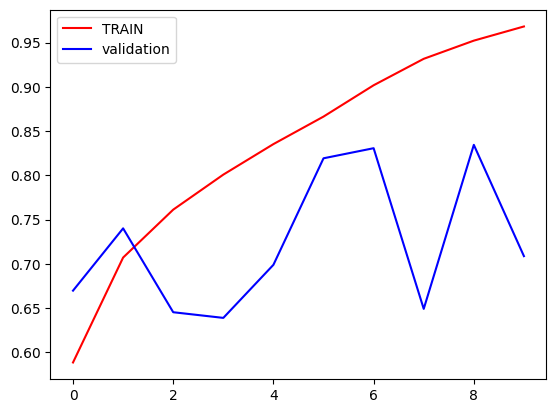

In [ ]:
#CHECKING THE PERFORMANCE OF THE MODEL
#MAKING GRAPH
plt.plot(history.history['accuracy'],color = 'red',label='TRAIN')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')
plt.legend()
plt.show()



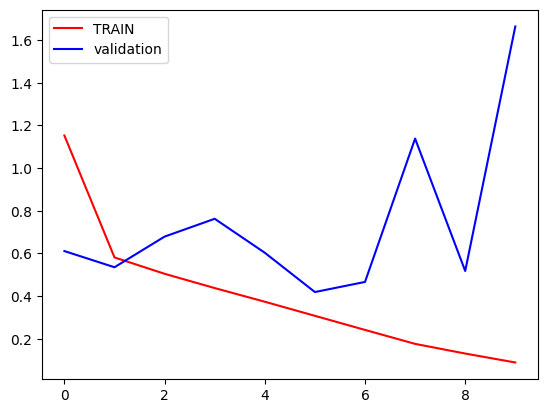

In [ ]:
plt.plot(history.history['loss'],color = 'red',label='TRAIN')
plt.plot(history.history['val_loss'],color = 'blue',label='validation')
plt.legend()
plt.show()


OBSERVATION :

*   THE GAP BETWEEN THE TWO PLOTTED LINES INDICATE OVERFITTING.
*   OUR MODEL IS CLEARLY OVERFIT AS IT IS WORKING WELL ON THE TRAINING DATASET BUT NOT SO WELL ON THE TEST DATASET.



In [ ]:
import cv2

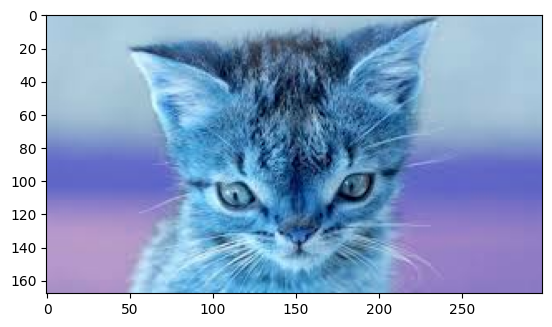

In [ ]:
img = cv2.imread('/content/cat1.jpg')
plt.imshow(img)


In [ ]:
img.shape

(168, 299, 3)

In [ ]:
img = cv2.resize(img,(256,256))
inp = img.reshape((1,256,256,3))
model.predict(inp)

1/1 [==============================] - 0s 304ms/step


array([[0.]], dtype=float32)

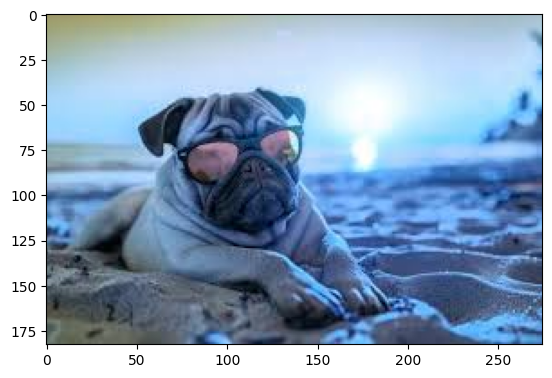

In [ ]:
img = cv2.imread('/content/dog1.jpg')
plt.imshow(img)

In [ ]:
img.shape

(183, 275, 3)

In [ ]:
img = cv2.resize(img,(256,256))
inp = img.reshape((1,256,256,3))
model.predict(inp)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

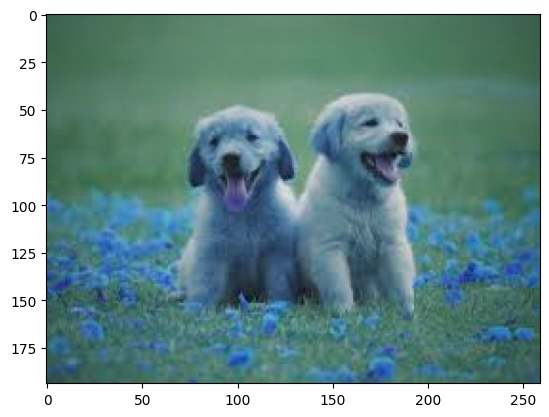

In [ ]:
img = cv2.imread('/content/dog2.jpg')
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(256,256))
inp = img.reshape((1,256,256,3))
model.predict(inp)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

TypeError: ignored

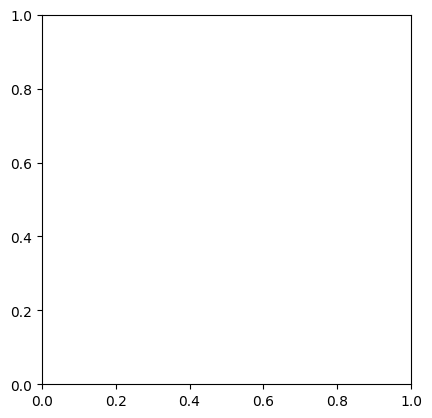

In [ ]:
img = cv2.imread('/content/dog3.avif')
plt.imshow(img)

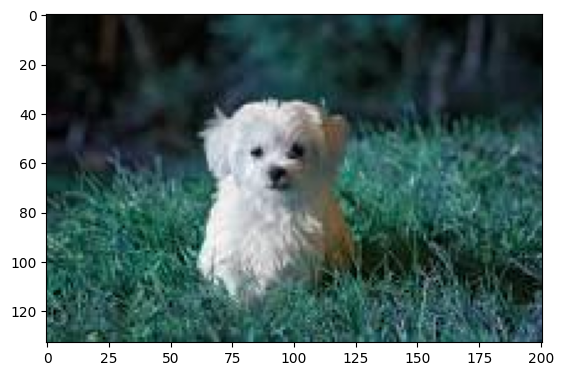

In [ ]:
img = cv2.imread('/content/dog4.jpg')
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(256,256))
inp = img.reshape((1,256,256,3))
model.predict(inp)

1/1 [==============================] - 0s 52ms/step


array([[0.]], dtype=float32)

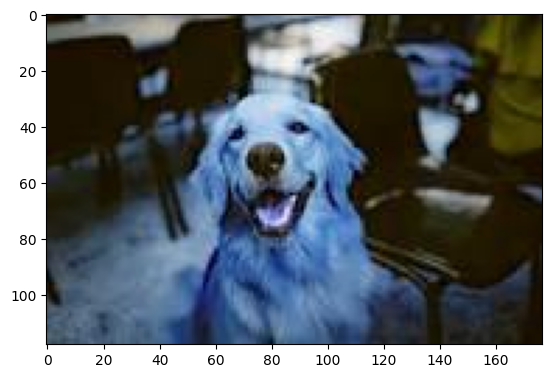

In [ ]:
img = cv2.imread('/content/dog5.jpg')
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(256,256))
inp = img.reshape((1,256,256,3))
model.predict(inp)

1/1 [==============================] - 0s 51ms/step


array([[0.]], dtype=float32)